Checking the GENEWIZ-30-286594819 data set for quality and sample swaps.  The samples are MSSM_338_NeuN_pl MSSM_065_NeuN_pl MSSM_033_NeuN_pl MSSM_310_NeuN_pl.  Consult 2018-12-18-verifyBamID for interpretation and technical details.

In [248]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import attila_utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import io
import data_check
matplotlib.rcParams['figure.dpi'] = 150
plt.style.use('seaborn')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mapped reads

This is readily investigated by `samtools idxstats` after indexing BAMs

In [265]:
df = data_check.idxstats()
df

,Name,Length,Mapped,Unmapped,Unmapped frac
0,1,249250621,44621626,381373,0.008474
1,2,243199373,60993321,1491713,0.023873
2,3,198022430,30788724,314107,0.010099
3,4,191154276,28117949,315804,0.011107
4,5,180915260,28411898,290538,0.010122
...,...,...,...,...,...
82,GL000225.1,211173,167593,1606,0.009492
83,GL000192.1,547496,86878,875,0.009971
84,NC_007605,171823,651,26,0.038405
85,hs37d5,35477943,76041346,250951,0.003289


## Sample purity and label swap

Recall that the notebook entry 2018-12-18-verifyBamID used `verifyBamID` to check (mapped) sequencing data for sample purity and swap.  Here we apply the same procedure to MSSM_338_NeuN_pl MSSM_065_NeuN_pl MSSM_033_NeuN_pl MSSM_310_NeuN_pl

In [4]:
%%bash
# first create 2019-11-04-GENEWIZ-data-check/doCMCverifyBamID script similarly to 2018-12-18-verifyBamID/doCMCverifyBamID
if false; then
    cd /projects/bsm/attila/results/2019-11-04-GENEWIZ-data-check
    ./doCMCverifyBamID
fi

In [81]:
vres = pd.read_csv('all.selfSM', sep='\t')
vres

,sample,indivID,tissue,SEQ_ID,RG,CHIP_ID,SNPS,READS,AVG_DP,FREEMIX,...,FREE_RH,FREE_RA,CHIPMIX,CHIPLK1,CHIPLK0,CHIP_RH,CHIP_RA,DPREF,RDPHET,RDPALT
0,MSSM_033_NeuN_pl,MSSM_033,NeuN_pl,0_MSSM_106,ALL,0_MSSM_106,668238,6000369,8.98,0.00554,...,NaN,NaN,0.00837,1438160.07,1460164.54,NaN,NaN,8.968,0.9982,1.0171
1,MSSM_065_NeuN_pl,MSSM_065,NeuN_pl,0_MSSM_135,ALL,0_MSSM_135,668238,9456314,14.15,0.00183,...,NaN,NaN,0.00163,2118895.14,2122625.25,NaN,NaN,14.129,1.0061,0.9962
2,MSSM_310_NeuN_pl,MSSM_310,NeuN_pl,0_MSSM_356,ALL,0_MSSM_356,668238,11282652,16.88,0.00764,...,NaN,NaN,0.00757,2563161.76,2598727.35,NaN,NaN,16.859,1.0041,1.0039
3,MSSM_338_NeuN_pl,MSSM_338,NeuN_pl,0_MSSM_381,ALL,0_MSSM_381,668238,12990848,19.44,0.00324,...,NaN,NaN,0.00324,2851525.68,2864803.73,NaN,NaN,19.424,1.0028,1.0006


['named-figure/freemix.png', 'named-figure/freemix.pdf']

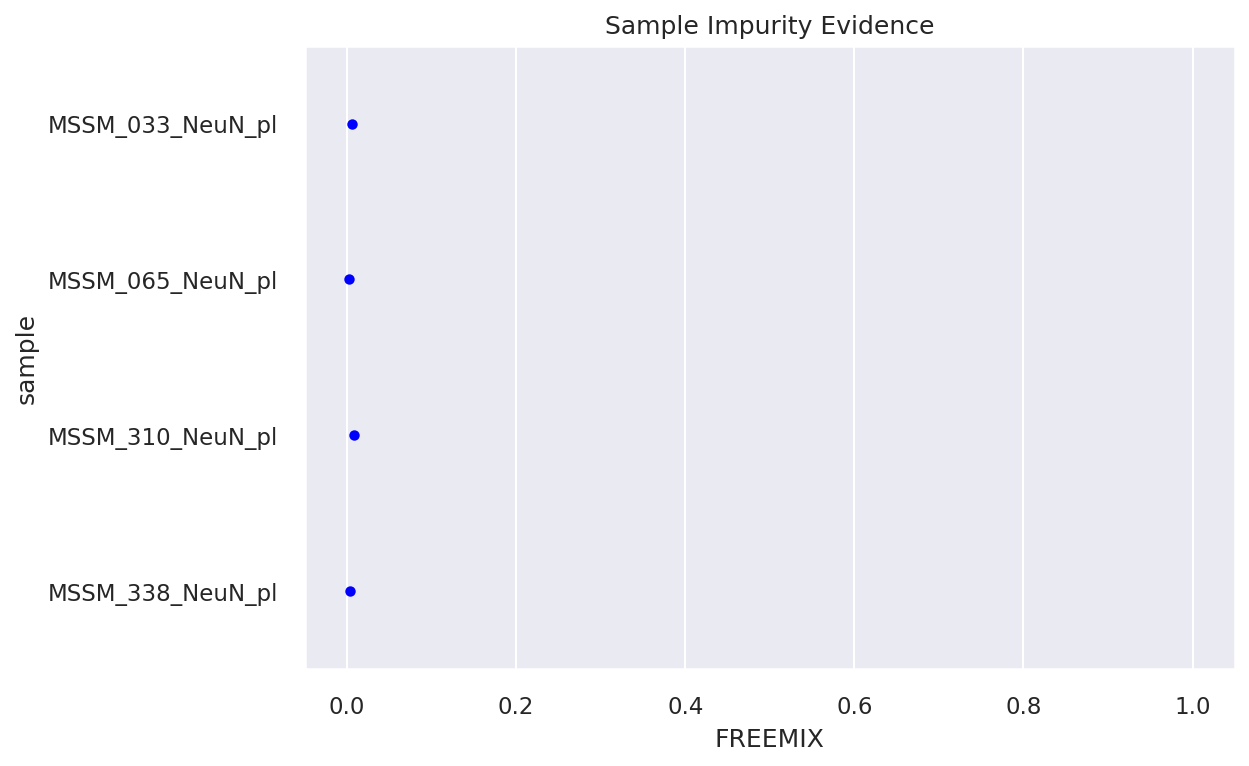

In [219]:
g = sns.stripplot(x='FREEMIX', y='sample', data=vres, jitter=False, color='blue')
g.axes.set_xlim([-0.05, 1.05])
g.axes.set_title('Sample Impurity Evidence')
attila_utils.savefig(fig, 'freemix')

['named-figure/chipmix.png', 'named-figure/chipmix.pdf']

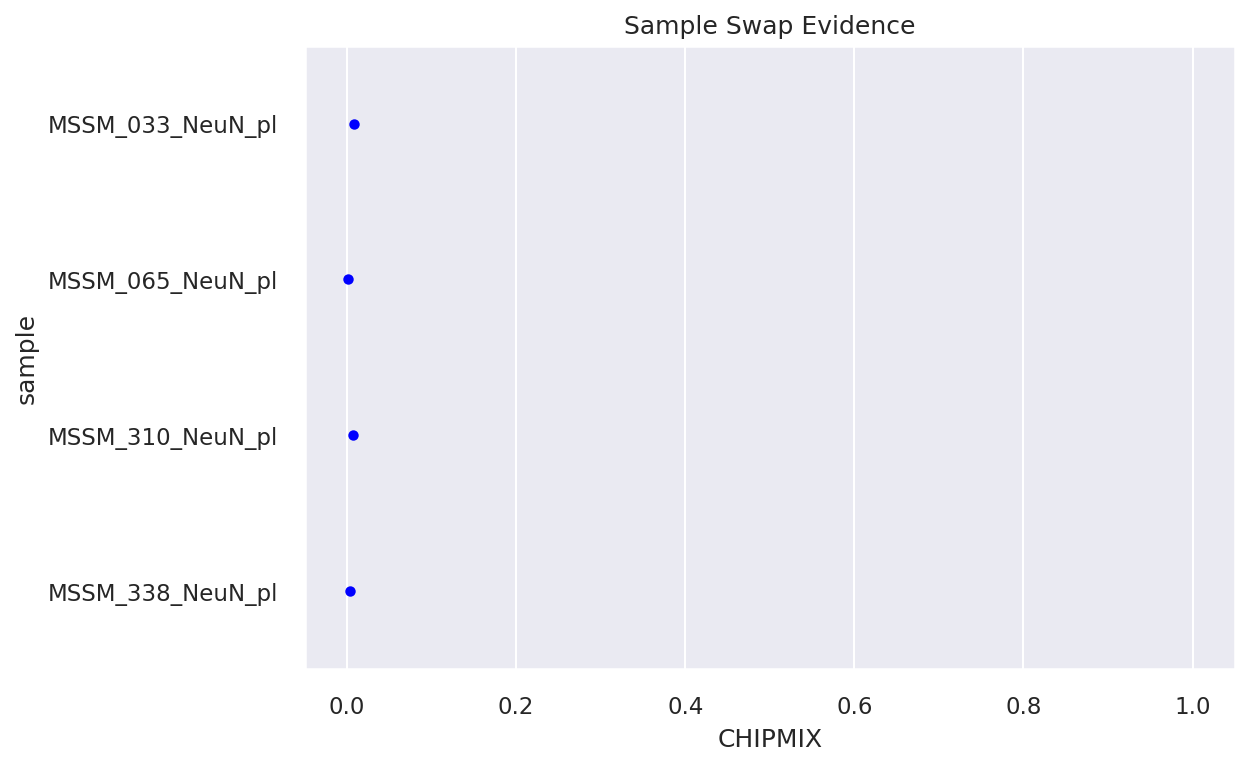

In [217]:
sns.set()
g = sns.stripplot(x='CHIPMIX', y='sample', data=vres, jitter=False, color='blue')
g.axes.set_xlim([-0.05, 1.05])
g.axes.set_title('Sample Swap Evidence')
attila_utils.savefig(fig, 'chipmix')

In [5]:
%connect_info

{
  "shell_port": 49439,
  "iopub_port": 34123,
  "stdin_port": 48759,
  "control_port": 42723,
  "hb_port": 34533,
  "ip": "127.0.0.1",
  "key": "f034b5d7-e441f90bc27e192df899c238",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d5810fe5-54b3-4b3e-9d29-07f4140ca027.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
